## Trump's Travels
The goal of this visualization is to track where Trump has been in the world during his presidency. Eventually we might compare it to that of Obama and previous predecessors. 

Longer-term goal would be to compare this to regions of the world mapped by Google search trends to see how presidents addressed foreign policy issues through their travels and how well their travel mapped onto the real world problems (i.e. were they focusing on the right things?)

In [2]:
# package imports.
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from geopy.geocoders import Nominatim
import wikipedia
import datetime 
from bs4 import BeautifulSoup

In [2]:
# Method to generate lat_long coordinates. 

def geolocate_location(data):
    geolocator = Nominatim()
    # returns object with latitude, longitude, altitude, address, and raw
    data['loc'] = data['location'].apply(lambda x: geolocator.geocode(x))
    return data

In [58]:
# Method to query Wikipedia for travel relating to specific president. 
def get_presidential_travel(president='Donald Trump', url_type='new'):
    ''' TODO: enforce strict rules on which presidents can be queried? '''
    # Pre-Reagan, Wikipedia uses a different URL structure for international trips. 
    if url_type == 'old':
        travel_page = wikipedia.page('Presidency of ' + president)
    else:
        travel_page = wikipedia.page('List of international presidential trips made by ' + president)
    soup = BeautifulSoup(travel_page.html(), 'lxml')
    tables = soup.find_all('table', class_='wikitable sortable') # usually the travel tables are sortable. 
    if len(tables) == 0:
        return pd.DataFrame()
    parsed_tables = []
    for t in tables:
        table_data = []
        rows = t.findAll('tr')
        for row in rows:
            children = row.findChildren(recursive=False)
            row_text = []
            for child in children:
                clean_text = child.text
                # Discard reference/citation links
                clean_text = clean_text.split('&#91;')[0]
                # This is to clean the header row
                clean_text = clean_text.split('&!160;')[-1]
                clean_text = clean_text.strip()
                row_text.append(clean_text)
            table_data.append(row_text)
        parsed_tables.extend(table_data)
    # Get rid of weird extra stuff
    for i,t in enumerate(parsed_tables):
        if len(t) > 4:
            parsed_tables[i] = t[len(t)-4:]
    tables = pd.DataFrame(parsed_tables, columns=['date', 'country', 'location', 'purpose'])
    # Drop weird holdover rows that result from combined tables.
    tables = tables[tables['date'] != 'Dates']
    # GEOCODER NOT WORKING RN SMH
    #tables = geolocate_location(tables)
    tables['president'] = [president for el in range(len(tables))]
    tables
    return tables

In [66]:
# Pull data for as many presidents as you can. 
# Note, might have to change tactics for pre-Reagan era, since the URL for this is different. 
data = []
new_presidents = ['Donald Trump', 'Barack Obama', 'George W. Bush', 'Bill Clinton', 'George H. W. Bush', 'Ronald Reagan']
for p in new_presidents: 
    data.append(get_presidential_travel(p))

In [59]:
old_presidents = ['Jimmy Carter', 'Gerald Ford', 'Richard Nixon', 'Harry S. Truman', 'Franklin D. Roosevelt', 'Dwight D. Eisenhower']
for p in old_presidents:
    data.append(get_presidential_travel(p, 'old'))

In [65]:
# Combine the dataframes and save for future use. 
final_data = pd.concat(data)
final_data.to_csv('pres_travel_1933_2018.csv', index=False)

In [64]:
final_data

,date,country,location,purpose,president
1,"May 20–22, 2017",Saudi Arabia,Riyadh,met with King Salman and Muslim leaders at the...,Donald Trump
2,"May 22–23, 2017",Israel,Jerusalem,Met with President Reuven Rivlin and Prime Min...,Donald Trump
3,"May 23, 2017",Palestinian National Authority (West Bank),Bethlehem,Met with Palestinian President Mahmoud Abbas.[7],Donald Trump
4,"May 23–24, 2017",Italy,Rome,Met with President Sergio Mattarella and Prime...,Donald Trump
5,"May 24, 2017",Vatican City,Vatican City,Met with Pope Francis.[1][9],Donald Trump
6,"May 24–25, 2017",Belgium,Brussels,Met with King Philippe and Prime Minister Char...,Donald Trump
7,"May 25–27, 2017",Italy,Taormina,Attended the 43rd G7 summit. He also held a bi...,Donald Trump
8,"July 5–6, 2017",Poland,Warsaw,Met with President Andrzej Duda and Croatian P...,Donald Trump
9,"July 6–8, 2017",Germany,Hamburg,"Attended the 2017 G20 Hamburg summit, along wi...",Donald Trump
10,"July 13–14, 2017",France,Paris,Met with President Emmanuel Macron.[21] Partic...,Donald Trump


# Now let's visualize!

### TODO:
 - Try basic Python mapping
 - Think about other ways to do this with d3?
 - What can we do with spatiotemporal information?
 
### Things to visualize:
 - Time of year for Presidential visits. 
 - Location popularity for each president. (DONE)
 - Number of times a given country has been visited. 
 - Location differences for presidents of different parties. (DONE)
 - Length of visit by party. 
 - Number of visits per president by length of time in office. 
 - Percentage of time spent away from DC vs in it (on foreign missions).
 - Estimated cost spent on travel by converting to US dollars. 
 - Comparison of chosen visit locations to popular news stories at the time? 
 - Overlay world events with Presidential visits to see if they line up. 
 - Prediction of major world events based on where the President goes (like do they give a warning sign?)
 
### Stories to tell:
Not sure yet. Must visualize first. 

In [3]:
# Load the data.
final_data = pd.read_csv('./pres_travel_1933_2018.csv')
# Add in party information.
republicans = ['Donald Trump', 'George W. Bush', 'George H. W. Bush', 'Ronald Reagan', 'Dwight D. Eisenhower', 'Richard Nixon', 'Gerald Ford']
democrats = ['Barack Obama', 'Bill Clinton', 'Franklin D. Roosevelt', 'Jimmy Carter']
def set_party(pres):
    if pres in republicans:
        return 'r'
    else: 
        return 'd'
  
final_data['party'] = [set_party(el) for el in final_data['president']]

In [4]:
# Do some data munging with dates. ISSUE: how do you deal with the date range aspect?
dt = final_data.iloc[0]['date']

In [5]:
countries = final_data['country']

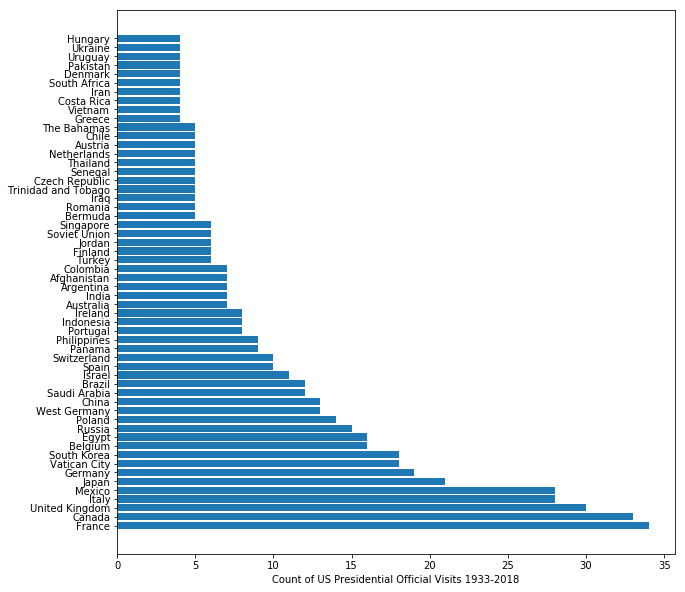

In [8]:
## Histogram of locations. 
country_counts = final_data['country'].value_counts()
country_counts = country_counts[country_counts > 3]
plt.figure(figsize=(10,10))
plt.barh(range(len(country_counts)), country_counts.values, tick_label=list(country_counts.index))
plt.xlabel('Count of US Presidential Official Visits 1933-2018')
plt.show()

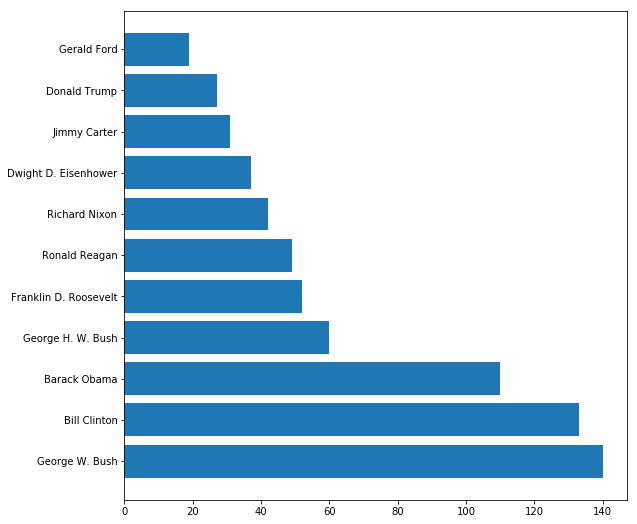

In [9]:
# How many days of travel.
trip_count = final_data['president'].value_counts()
plt.figure(figsize=(9,9))
plt.barh(range(len(trip_count)), trip_count.values, tick_label = list(trip_count.index))
plt.show()

<built-in function len>


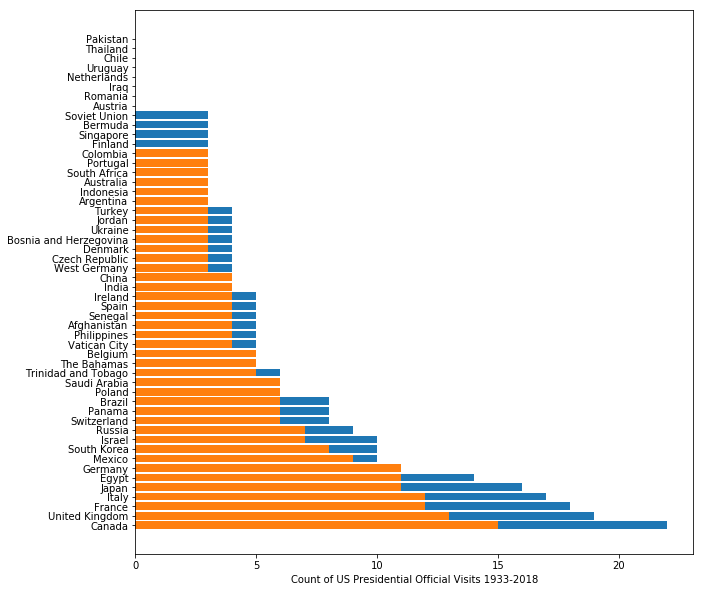

In [64]:
# Stacked bar chart of travel by party and president. 
r_country_counts = final_data['country'][final_data['party'] == 'r'].value_counts()
d_country_counts = final_data['country'][final_data['party'] == 'd'].value_counts()

r_country_counts = r_country_counts[r_country_counts > 2]
d_country_counts = d_country_counts[d_country_counts > 2]

# Figure out which ones have overlap
for el in r_country_counts.index:
    if el not in d_country_counts.index:
        d_country_counts[el] = 0
        
# Can't figure out how to get the stacked chart to work.
plt.figure(figsize=(10,10))
plt.barh(range(len(r_country_counts)), r_country_counts.values, tick_label = list(r_country_counts.index))
plt.barh(range(len(d_country_counts)), d_country_counts.values, tick_label = list(d_country_counts.index))
#plt.yticks(list(r_country_counts.index))
plt.xlabel('Count of US Presidential Official Visits 1933-2018')
plt.show()
#plt.show()

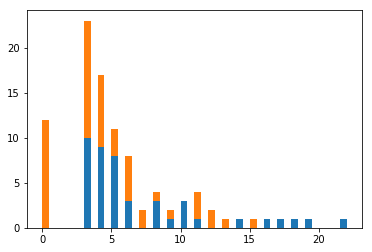

In [61]:
# Alternative stacked bar chart -- ugly.
plt.figure()
plt.hist([r_country_counts.values, d_country_counts], bins=len(r_country_counts), stacked=True)
plt.show()

#### Plot leaning for country.

In [76]:
countries = final_data['country'].value_counts().index

In [89]:
# Now do the ratio of R/D for each country visited. 
d_to_r_visit_lean = [len(final_data['party'][(final_data['country'] == country) & (final_data['party'] == 'd')])/
                    len(final_data[final_data['country'] == country]) for country in countries]

In [108]:
leaning = pd.DataFrame({'d_lean': d_to_r_visit_lean, 'country': list(countries)})
color = ['r' if el< 0.5 else 'b' for el in leaning['d_lean']]

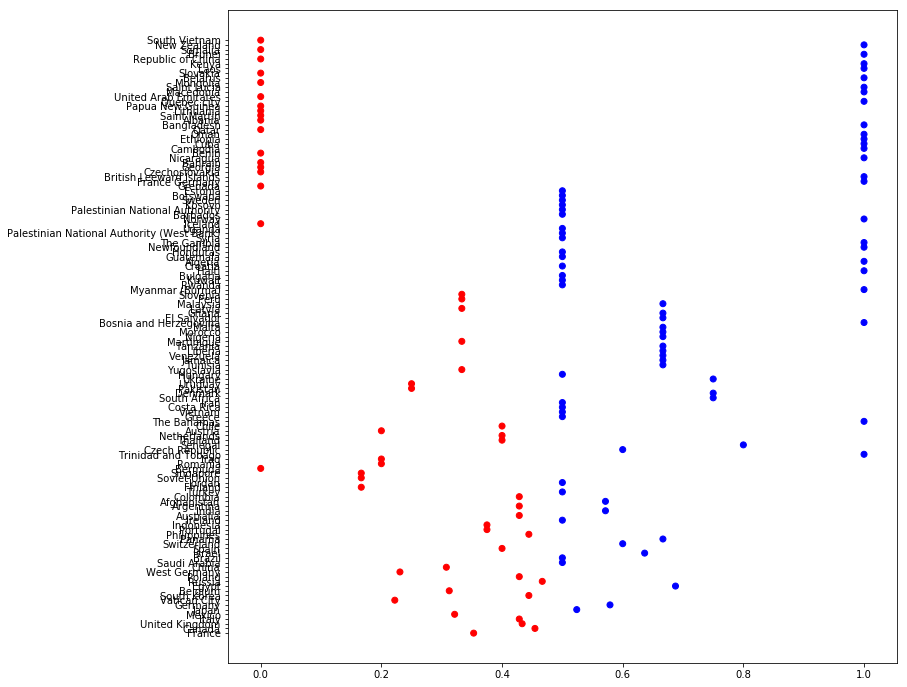

In [107]:
plt.figure(figsize=(12,12))
plt.scatter(leaning['d_lean'], range(len(leaning['country'])), color=color)
plt.yticks(range(len(list(countries))), list(countries))
plt.show()

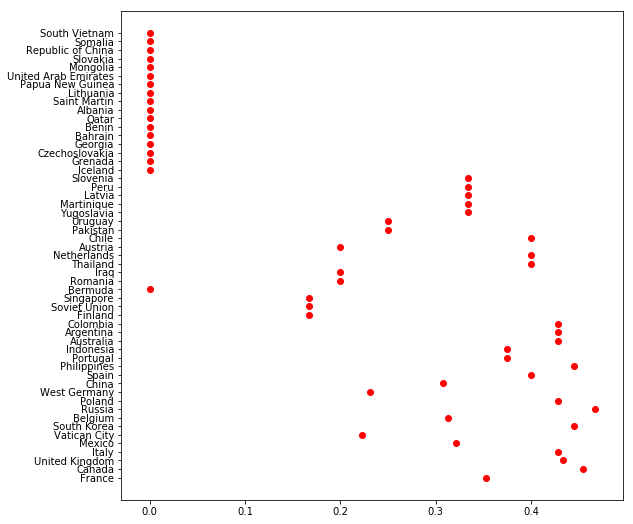

In [115]:
# Just Republican-dominated visits.
leaning1 = leaning[leaning['d_lean'] < 0.5]
plt.figure(figsize=(9,9))
plt.scatter(leaning1['d_lean'], range(len(leaning1['country'])), color='r')
plt.yticks(range(len(list(leaning1['country']))), list(leaning1['country']))
plt.show()

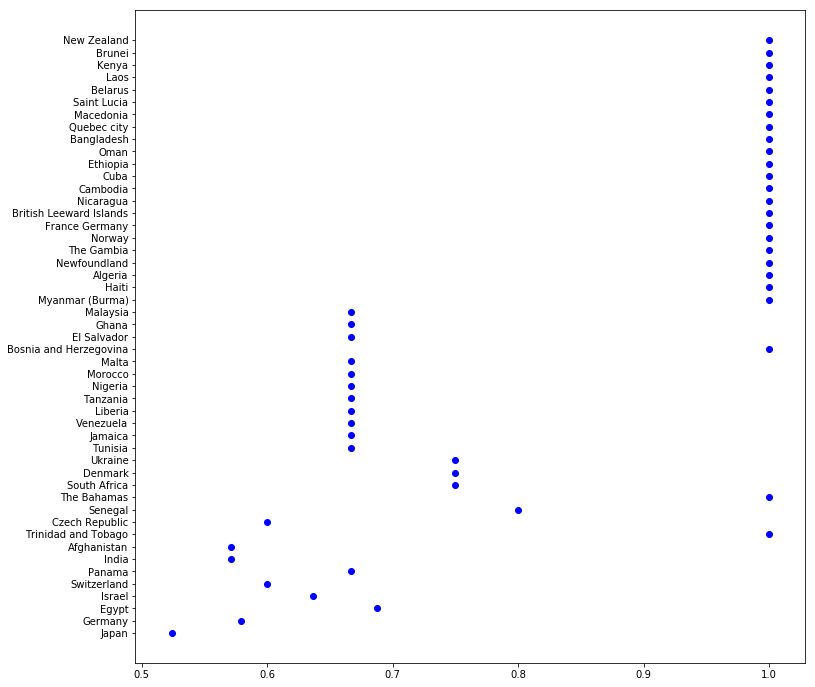

In [111]:
# Just Democrat-dominated visits.
leaning1 = leaning[leaning['d_lean'] > 0.5]
plt.figure(figsize=(12,12))
plt.scatter(leaning1['d_lean'], range(len(leaning1['country'])), color='b')
plt.yticks(range(len(list(leaning1['country']))), list(leaning1['country']))
plt.show()

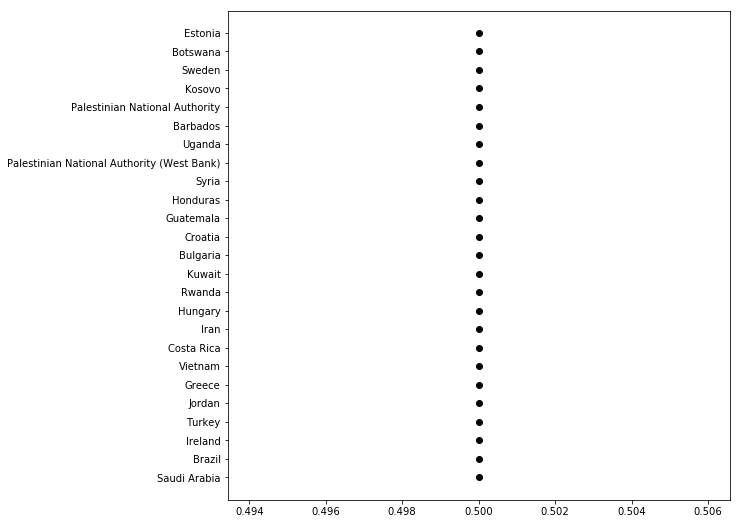

In [114]:
#  Neutral visits.
leaning1 = leaning[leaning['d_lean'] == 0.5]
plt.figure(figsize=(9,9))
plt.scatter(leaning1['d_lean'], range(len(leaning1['country'])), color='black')
plt.yticks(range(len(list(leaning1['country']))), list(leaning1['country']))
plt.show()

### Map by time of year and subsequent popularity. 

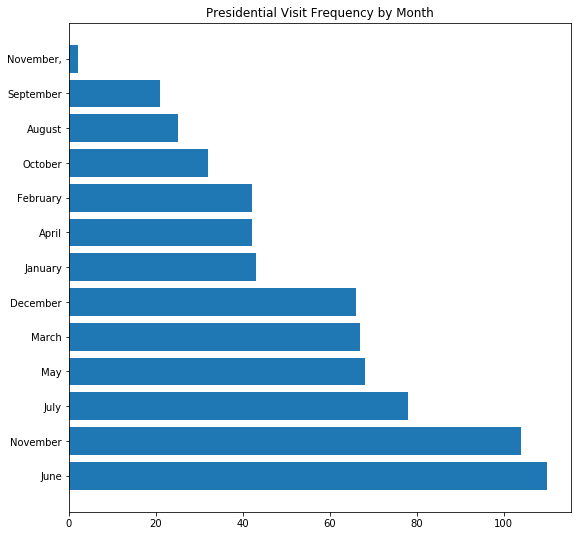

In [126]:
months = [el.split(' ')[0] for el in final_data['date']]
monthdf = pd.DataFrame({'month':months, 'country': final_data['country']})
month_visit_count = monthdf['month'].value_counts()

plt.figure(figsize=(9,9))
plt.barh(range(len(month_visit_count)), month_visit_count.values, tick_label=list(month_visit_count.index))
plt.title('Presidential Visit Frequency by Month')
plt.show()

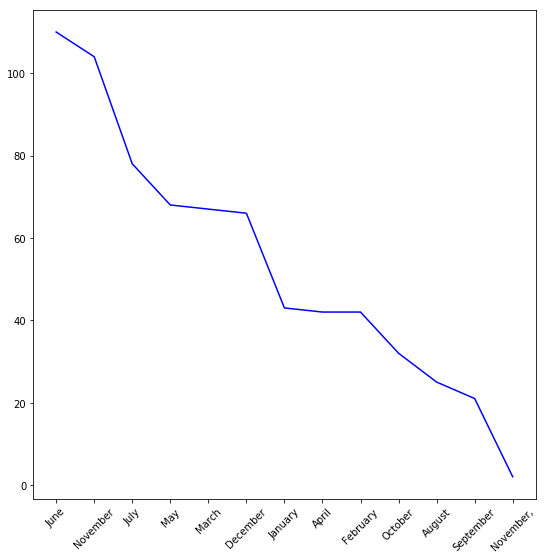

In [135]:
plt.figure(figsize=(9,9))
plt.plot(range(len(month_visit_count)), month_visit_count.values, 'b-')
plt.xticks(range(len(month_visit_count)), list(month_visit_count.index), rotation=45)
plt.show()

### Small multiples for most frequently visited countries and when they are most visited.

In [33]:
# This should be easy and pretty. 
country_freq = final_data['country'].value_counts()

# Get most frequent countries.
high_country_freq = country_freq[country_freq > 14]
# Get when countries were visited. 
months = [el.split(' ')[0] for el in final_data['date']]
monthdf = pd.DataFrame({'month':months, 'country': final_data['country']})
# Month sort
m = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
mapping = dict(zip(m, [i for i in range(len(m))]))

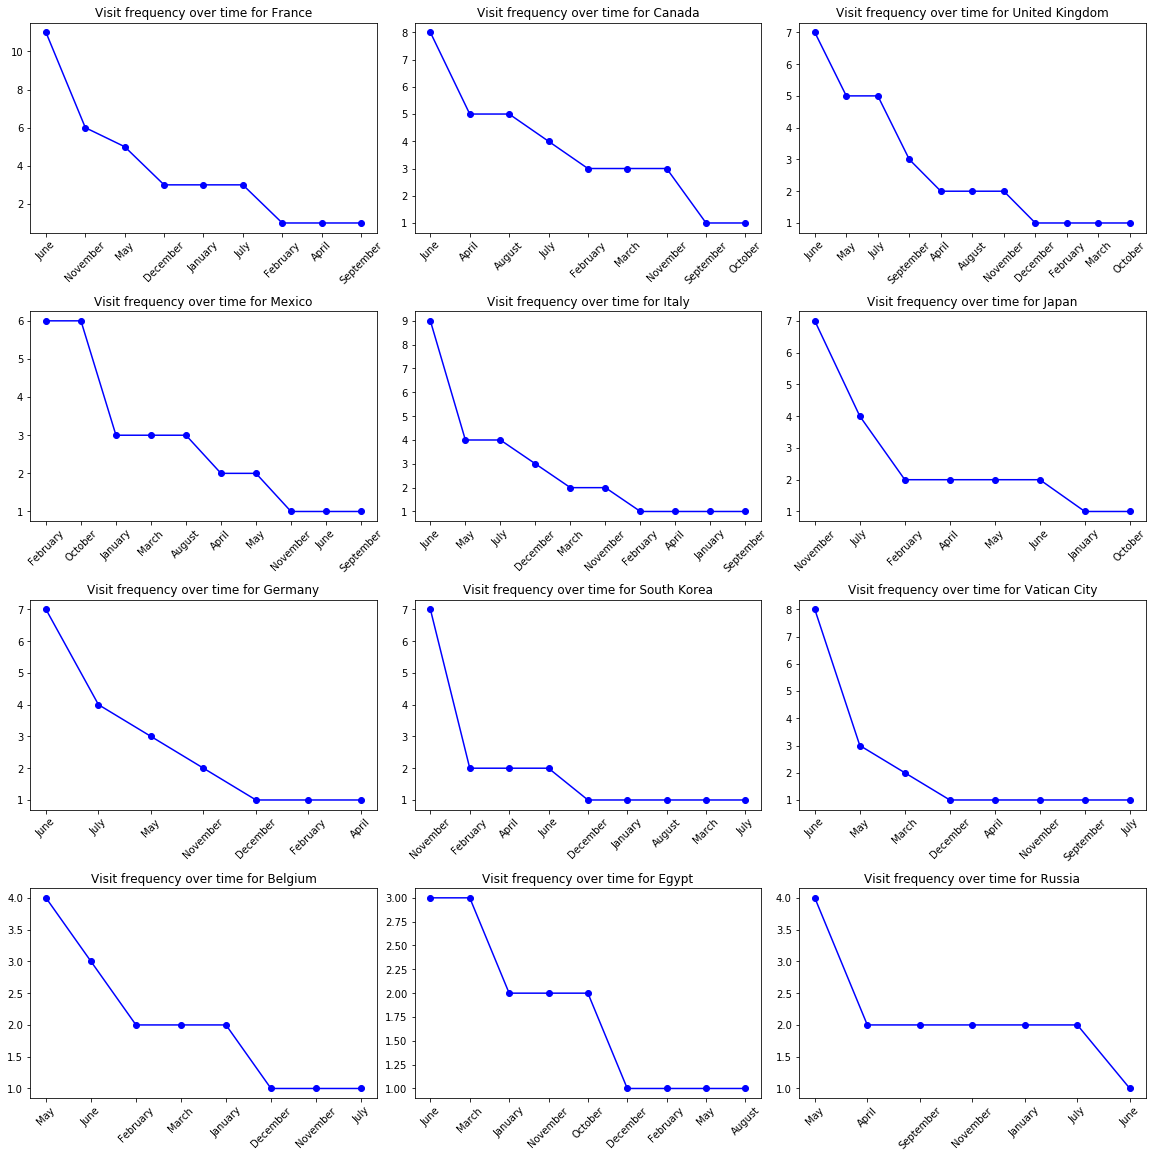

In [47]:
# Make this have 4 rows and 3 columns.
plt.figure(figsize=(16,16))
for i,ctry in enumerate(high_country_freq.index):
    month_visit_count = monthdf['month'][monthdf['country'] == ctry].value_counts()
    plt.subplot(4, 3, i+1)
    plt.plot(range(len(month_visit_count)), month_visit_count.values, 'bo-')
    plt.xticks(range(len(month_visit_count)), list(month_visit_count.index), rotation=45)
    plt.title('Visit frequency over time for ' + ctry)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.show()

### Small multiples for where each president visited. 

In [48]:
# Will require some visual graphing capabilities. 